In [1]:
# standard+
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats

# machine learning tools
from sklearn.model_selection import train_test_split
!pip install h2o
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator, H2OGradientBoostingEstimator

In [2]:
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook

default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

In [3]:
# this code is for importing the dataset locally
df = pd.read_csv(filepath_or_buffer = 'osteoporosis.csv',
                  engine='python',
                  sep=',',
                  header=0)
df.sample(n=10, replace=True)

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
885,1124320,64,Female,Normal,No,Asian,Normal,Low,Sufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,1
1106,1920490,22,Female,Normal,Yes,Asian,Normal,Adequate,Sufficient,Active,No,Moderate,Rheumatoid Arthritis,NaN,No,0
185,1989842,90,Male,Normal,Yes,Caucasian,Normal,Low,Sufficient,Active,No,Moderate,NaN,NaN,No,1
191,1108655,53,Female,Normal,No,African American,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,No,1
802,1153170,81,Female,Normal,No,African American,Normal,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,1
605,1815496,89,Female,Postmenopausal,No,Caucasian,Normal,Low,Insufficient,Active,No,Moderate,Hyperthyroidism,NaN,Yes,1
1927,1985293,20,Male,Normal,Yes,African American,Underweight,Low,Insufficient,Active,No,Moderate,Hyperthyroidism,NaN,No,0
925,1364919,52,Male,Normal,No,Asian,Underweight,Low,Sufficient,Sedentary,No,Moderate,Hyperthyroidism,NaN,No,1
1786,1410713,34,Male,Normal,Yes,Asian,Normal,Adequate,Insufficient,Active,Yes,NaN,NaN,NaN,Yes,0
74,1576012,46,Male,Postmenopausal,No,African American,Normal,Low,Sufficient,Sedentary,No,Moderate,Rheumatoid Arthritis,Corticosteroids,No,1


In [ ]:
# Section 2: Demographics (Cris)

# from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns

# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/My Drive/osteoporosis.csv', header = 0)

#Creating new variable Age Group
df['Age_Group'] = ''
df.loc[df['Age'] < 31, 'Age_Group'] = '1.[18-30]'
df.loc[(df['Age'] >= 31) & (df['Age'] < 46), 'Age_Group'] = '2.[31-45]'
df.loc[(df['Age'] >=46) & (df['Age'] < 61), 'Age_Group'] = '3.[45-60]'
df.loc[(df['Age'] >= 61) & (df['Age'] < 76), 'Age_Group'] = '4.[61-75])'
df.loc[df['Age'] >= 76, 'Age_Group'] = '5.[75-90]'

demographicslist = df[['Id', 'Age', 'Age_Group',  'Gender', 'Race/Ethnicity', 'Osteoporosis']]
demographicslist.head()

,Id,Age,Age_Group,Gender,Race/Ethnicity,Osteoporosis
0,1734616,69,4.[61-75]),Female,Asian,1
1,1419098,32,2.[31-45],Female,Asian,1
2,1797916,89,5.[75-90],Female,Caucasian,1
3,1805337,78,5.[75-90],Female,Caucasian,1
4,1351334,38,2.[31-45],Male,African American,1


In [ ]:
agegroupanalysis = demographicslist.groupby(['Age_Group','Osteoporosis'])
count1 = agegroupanalysis.count()
people_count = count1['Id']
demographics_AgeGroup = people_count.unstack(level = 1)
demographics_AgeGroup_filled = demographics_AgeGroup.fillna(0)
demographics_AgeGroup_filled['Total Group'] = demographics_AgeGroup_filled[0] + demographics_AgeGroup_filled[1]
demographics_AgeGroup_filled['Osteoporosis Rate'] = (demographics_AgeGroup_filled[1]/demographics_AgeGroup_filled['Total Group'])*100
demographics_AgeGroup_filled['Osteoporosis Rate Percentage'] = demographics_AgeGroup_filled['Osteoporosis Rate'].round(2)
demographics_AgeGroup_filled = demographics_AgeGroup_filled.drop(columns=['Osteoporosis Rate'])
demographics_AgeGroup_filled

Osteoporosis,0,1,Total Group,Osteoporosis Rate Percentage
Age_Group,,,,
1.[18-30],794.0,171.0,965.0,17.72
2.[31-45],185.0,205.0,390.0,52.56
3.[45-60],0.0,196.0,196.0,100.00
4.[61-75]),0.0,206.0,206.0,100.00
5.[75-90],0.0,201.0,201.0,100.00


In [ ]:
genderanalysis = demographicslist.groupby(['Gender','Osteoporosis'])
count2 = genderanalysis.count()
people_count2 = count2['Id']
demographics_Gender = people_count2.unstack(level = 1)
demographics_Gender['Total Group'] = demographics_Gender[0] + demographics_Gender[1]
demographics_Gender['Osteoporosis Rate by Gender'] = (demographics_Gender[1]/demographics_Gender['Total Group'])*100
demographics_Gender['Osteoporosis Rate by Gender - Percentage'] = demographics_Gender['Osteoporosis Rate by Gender'].round(2)
demographics_Gender = demographics_Gender.drop(columns=['Osteoporosis Rate by Gender'])
demographics_Gender


Osteoporosis,0,1,Total Group,Osteoporosis Rate by Gender - Percentage
Gender,,,,
Female,489,477,966,49.38
Male,490,502,992,50.60


In [ ]:
raceanalysis = demographicslist.groupby(['Race/Ethnicity','Osteoporosis'])
count3 = raceanalysis.count()
people_count3 = count3['Id']
demographics_Race = people_count3.unstack(level = 1)
demographics_Race['Total Group'] = demographics_Race[0] + demographics_Race[1]
demographics_Race['Osteoporosis Rate by Race/Ethnicity'] = (demographics_Race[1]/demographics_Race['Total Group'])*100
demographics_Race['Osteoporosis Rate by Race/Ethnicity - Percentage'] = demographics_Race['Osteoporosis Rate by Race/Ethnicity'].round(2)
demographics_Race = demographics_Race.drop(columns=['Osteoporosis Rate by Race/Ethnicity'])
demographics_Race

Osteoporosis,0,1,Total Group,Osteoporosis Rate by Race/Ethnicity - Percentage
Race/Ethnicity,,,,
African American,337,344,681,50.51
Asian,317,314,631,49.76
Caucasian,325,321,646,49.69


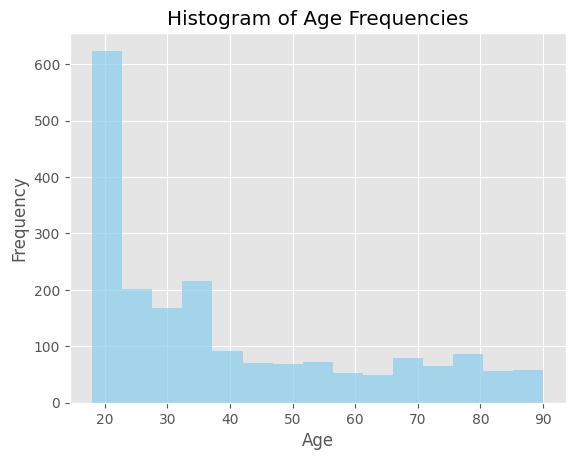

In [ ]:
from matplotlib import pyplot as plt
AgeHist = df[['Age']]
plt.hist(AgeHist, bins=15, color='skyblue', histtype='bar', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Frequencies')
plt.grid(True)
plt.show()

In [ ]:
df['Age'].mean()

39.10112359550562

In [ ]:
df['Age'].median()

32.0

In [ ]:
df['Age'].std()

21.355424440987388

In [ ]:
df['Age'].skew()

0.9087413982875837

In [ ]:
df['Age'].corr(df['Osteoporosis'])

0.6912382540603556

In [ ]:
correlations = (demographicslist[['Osteoporosis', 'Age_Group']]
                .groupby('Age_Group')
                .corrwith(demographicslist['Age'])
                .rename(columns={'sepal length' : 'Corr Coef'}))

correlations

,Osteoporosis
Age_Group,
1.[18-30],0.180304
2.[31-45],0.416511
3.[45-60],NaN
4.[61-75]),NaN
5.[75-90],NaN


Text(0, 0.5, 'Osteoporosis')

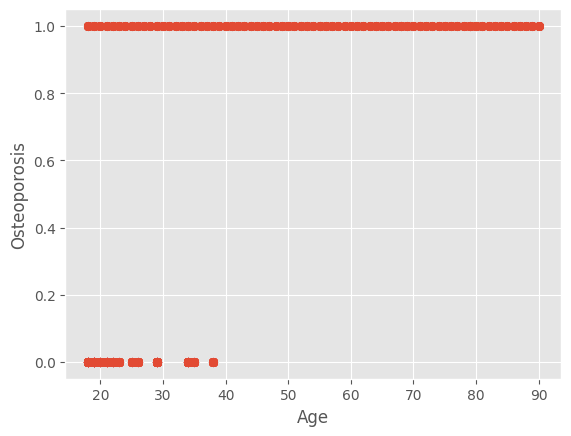

In [ ]:
plt.scatter(demographicslist['Age'], demographicslist['Osteoporosis'], alpha=0.7)
plt.xlabel(demographicslist.columns.values[1])
plt.ylabel(demographicslist.columns.values[5])

In [ ]:
import statsmodels.api as sm


import statsmodels.formula.api as smf

In [ ]:
X = demographicslist['Age']
y = demographicslist['Osteoporosis']

X = sm.add_constant(X)

est = sm.OLS(y, X).fit()


est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Osteoporosis   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     1790.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          2.83e-278
Time:                        18:37:23   Log-Likelihood:                -785.02
No. Observations:                1958   AIC:                             1574.
Df Residuals:                    1956   BIC:                             1585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1330      0.017     -7.801      0.000      -0.166      -0.100
Age            0.0162      0.000     42.306      0.000       0.015       0.017
==============================================================================
Omnibus:                      221.579   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.292
Skew:                           0.878   Prob(JB):                     3.34e-59
Kurtosis:                       2.535   Cond. No.                         93.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Section 3: Family History, Prior Fractures and Medications (Luca)

In [ ]:
# from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Authenticate and create the PyDrive client.
# drive.mount('/content/drive')

# # Read the CSV file into a list of lists.
# with open('/content/drive/My Drive/osteoporosis.csv') as csvfile:
#   reader = csv.reader(csvfile)
#   df = pd.DataFrame(reader, index=None)

# df = pd.read_csv('/content/drive/My Drive/osteoporosis.csv', header = 0)

df.head()


,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis,Age_Group
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,4.[61-75])
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1,2.[31-45]
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1,5.[75-90]
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,5.[75-90]
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1,2.[31-45]


In [ ]:
df1 = df[['Family History', 'Medications', 'Prior Fractures', 'Osteoporosis']]
df1.head()

,Family History,Medications,Prior Fractures,Osteoporosis
0,Yes,Corticosteroids,Yes,1
1,Yes,NaN,Yes,1
2,No,Corticosteroids,No,1
3,No,Corticosteroids,No,1
4,Yes,NaN,Yes,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Family History   1958 non-null   object
 1   Medications      973 non-null    object
 2   Prior Fractures  1958 non-null   object
 3   Osteoporosis     1958 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 61.3+ KB


The column 'Medications' have many NaN values. The NaN values are actually what in the original file is defined as "None', meaning no medication.
Let's convert these NaNs to 'None'.


In [ ]:
df1.replace({np.nan: 'None'}, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Family History   1958 non-null   object
 1   Medications      1958 non-null   object
 2   Prior Fractures  1958 non-null   object
 3   Osteoporosis     1958 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 61.3+ KB


<ipython-input-123-f91cccd1eb62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({np.nan: 'None'}, inplace=True)


The 3 variables are strings (objects in pandas), indicating they are categorical variables.
Let's check what unique values they have.

In [ ]:
df1['Family History'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df1['Medications'].unique()

array(['Corticosteroids', 'None'], dtype=object)

In [ ]:
df1['Prior Fractures'].unique()

array(['Yes', 'No'], dtype=object)

All the 3 variables have only 2 possible values each.

Because all the variables are categorical, there is no info to obtain from using describe() or other pandas methods to analyze the distribution of the dataset, except for the dependent variable, Osteoporosis, which is a numerical value of either 1 (patient has Osteoporosis) or 0 (patient doesn't have Osteoporosis).

In [ ]:
df1.Osteoporosis.describe()

count    1958.000000
mean        0.500000
std         0.500128
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: Osteoporosis, dtype: float64

Osteoporosis has a mean of exactly 0.5, indicating half of the patients have the disease, and half don't. When checking the situation of specific groups, a group average greatly different from 0.5 would indicate that the group definition likely has an impact on osteoporosis incidence.

With that in mind, we can use the groupby method to check whether a variable affects osteoporosis. No transformations are required since the independent variables are all categorical.

In [ ]:
df1.groupby('Family History')[['Osteoporosis']].aggregate(['mean', 'count', 'std', 'sem'])

Osteoporosis                         
                       mean count      std       sem
Family History                                      
No                 0.501002   998  0.50025  0.015835
Yes                0.498958   960  0.50026  0.016146

Family history doesn't appear to have an effect on the osteoporisis, since the two groups have an average osteoporosis value of 0.5, indicating about half of the subjects in each group have osteoporosis.

In [ ]:
df1.groupby('Medications')[['Osteoporosis']].aggregate(['mean', 'count', 'std', 'sem'])

Osteoporosis                          
                        mean count       std       sem
Medications                                           
Corticosteroids     0.516958   973  0.499969  0.016028
None                0.483249   985  0.499973  0.015930

Taking corticosteroids appears to very slightly increase the outcome of developing osteoporosis; the difference among the 2 groups is very small, and barely greater than a standard error of the mean.

In [ ]:
df1.groupby('Prior Fractures')[['Osteoporosis']].aggregate(['mean', 'count', 'std', 'sem'])

Osteoporosis                          
                        mean count       std       sem
Prior Fractures                                       
No                  0.492308   975  0.500197  0.016019
Yes                 0.507630   983  0.500196  0.015954

There is no clear effect of prior fractures either. It's interesting to also note how the count of the groups it's quite even for all three variables.

In [ ]:
df1.groupby(['Family History', 'Medications'])[['Osteoporosis']].aggregate(['mean', 'count', 'std', 'sem'])

Osteoporosis                          
                                       mean count       std       sem
Family History Medications                                           
No             Corticosteroids     0.537074   499  0.499124  0.022344
               None                0.464930   499  0.499269  0.022350
Yes            Corticosteroids     0.495781   474  0.500510  0.022989
               None                0.502058   486  0.500511  0.022704

Among people with no family history, those who use corticosteroids have a 53.7% incidence of osteoporosis, compared to 46.5% of those who don't. The difference is small but it's greater than the standard error of the mean, thus it could indicate an effect of these factors.
We can visualize this result.

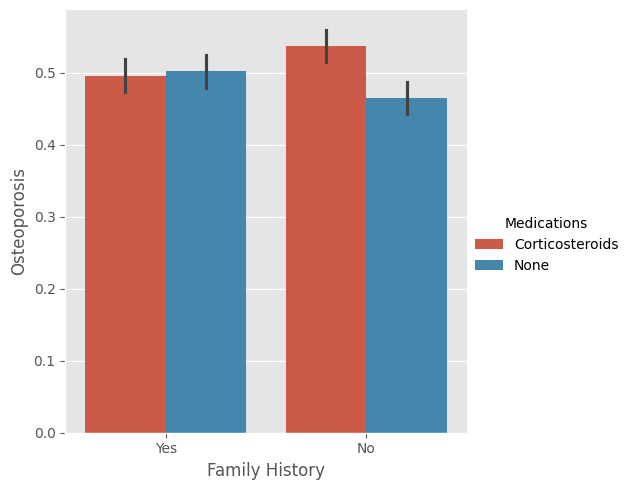

In [ ]:
sns.catplot(data=df1, x="Family History", y="Osteoporosis", hue="Medications", kind="bar", errorbar='se')

In [ ]:
df1.groupby(['Family History', 'Prior Fractures'])[['Osteoporosis']].aggregate(['mean', 'count', 'std', 'sem'])

Osteoporosis                          
                                       mean count       std       sem
Family History Prior Fractures                                       
No             No                  0.491903   494  0.500441  0.022516
               Yes                 0.509921   504  0.500398  0.022290
Yes            No                  0.492723   481  0.500468  0.022819
               Yes                 0.505219   479  0.500495  0.022868

In [ ]:
df1.groupby(['Medications', 'Prior Fractures'])[['Osteoporosis']].aggregate(['mean', 'count', 'std', 'sem'])

Osteoporosis                          
                                        mean count       std       sem
Medications     Prior Fractures                                       
Corticosteroids No                  0.486542   483  0.500337  0.022766
                Yes                 0.546939   490  0.498301  0.022511
None            No                  0.497967   492  0.500505  0.022564
                Yes                 0.468560   493  0.499517  0.022497

Other groupings of 2 don't reveal groups that have a strong difference in osteoporosis incidence.

In [ ]:
df1.groupby(['Family History','Medications', 'Prior Fractures'])[['Osteoporosis']].aggregate(['mean', 'count', 'std', 'sem'])

Osteoporosis                  \
                                                       mean count       std   
Family History Medications     Prior Fractures                                
No             Corticosteroids No                  0.510204   245  0.500919   
                               Yes                 0.562992   254  0.496995   
               None            No                  0.473896   249  0.500324   
                               Yes                 0.456000   250  0.499059   
Yes            Corticosteroids No                  0.462185   238  0.499619   
                               Yes                 0.529661   236  0.500180   
               None            No                  0.522634   243  0.500518   
                               Yes                 0.481481   243  0.500688   

                                                          
                                                     sem  
Family History Medications     Prior Fractures            
No             Corticosteroids No               0.032003  
                               Yes              0.031184  
               None            No               0.031707  
                               Yes              0.031563  
Yes            Corticosteroids No               0.032385  
                               Yes              0.032559  
               None            No               0.032108  
                               Yes              0.032119

Grouping the data by all the 3 variables shows two additional groups that standout, even though the differences are still small:
1. People with no family history, who use corticosteroids and have had prior fractures, have greater incidence of osteoporosis (56.3%).
2. People with family history, who use corticosteroids, and had no prior fractures, have a smaller incidence of osteoporosis (46.2%).

We can visualize these results.

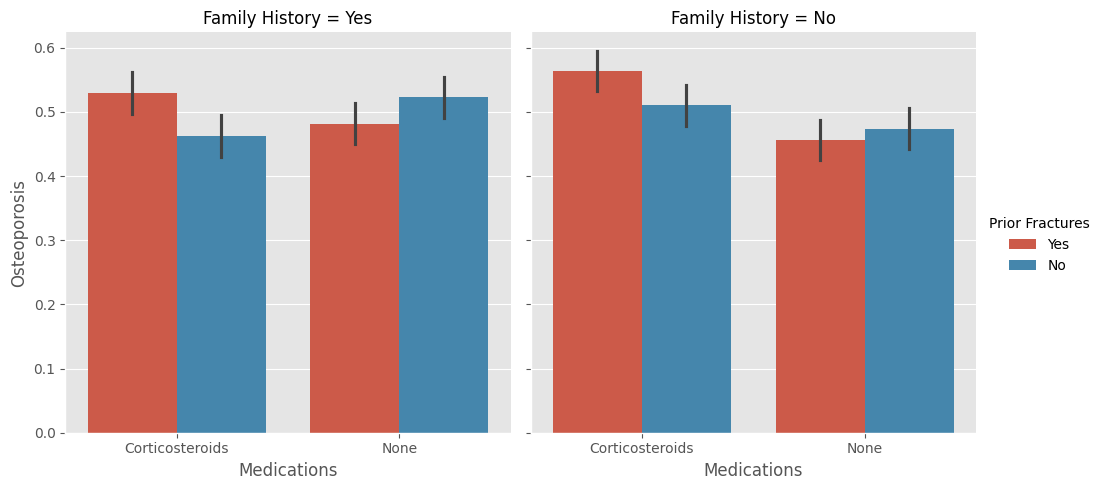

In [ ]:
sns.catplot(
    data=df1, x="Medications", y="Osteoporosis", hue="Prior Fractures",
    kind="bar", col="Family History", errorbar='se'
)

Because the combination of the three variables offers a better relationship with osteoporosis than the single variables or groups of 2, we can create a new variable by combining the three existing variables. We can assign this variable with the apply method to a new column of the dataframe.

In [ ]:
def diseases(value):
  fh, m, pf = value
  if fh == "No":
    if m == "None":
      if pf == "No":
        return "None"
      else:
        return 'pf'
    else:
      if pf == "No":
        return "m"
      else:
        return 'm_pf'
  else:
    if m == "None":
      if pf == "No":
        return "fh"
      else:
        return 'fh_pf'
    else:
      if pf == "No":
        return "fh_m"
      else:
        return 'fh_m_pf'

df1['Diseases'] = df1[['Family History','Medications', 'Prior Fractures']].apply(diseases, axis = 1)
df1






<ipython-input-137-5fb64b148f75>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Diseases'] = df1[['Family History','Medications', 'Prior Fractures']].apply(diseases, axis = 1)


,Family History,Medications,Prior Fractures,Osteoporosis,Diseases
0,Yes,Corticosteroids,Yes,1,fh_m_pf
1,Yes,None,Yes,1,fh_pf
2,No,Corticosteroids,No,1,m
3,No,Corticosteroids,No,1,m
4,Yes,None,Yes,1,fh_pf
...,...,...,...,...,...
1953,Yes,None,Yes,0,fh_pf
1954,Yes,Corticosteroids,No,0,fh_m
1955,No,None,No,0,None
1956,No,Corticosteroids,Yes,0,m_pf


This new combined variable ("Diseases") offers a better relation with osteoporosis. The relationship is still pretty small.

(1958, 16)
Count of 'None' in Alcohol Consumption column: 988
Count of 'Moderate' in Alcohol Consumption column: 970
Count of 'Yes' in Smoking column: 982
Count of 'No' in Smoking column: 976


<ipython-input-8-a47b4519caeb>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Smoking', palette='Set1')
<ipython-input-8-a47b4519caeb>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Alcohol Consumption', order=['None', 'Moderate'], palette='Set2')


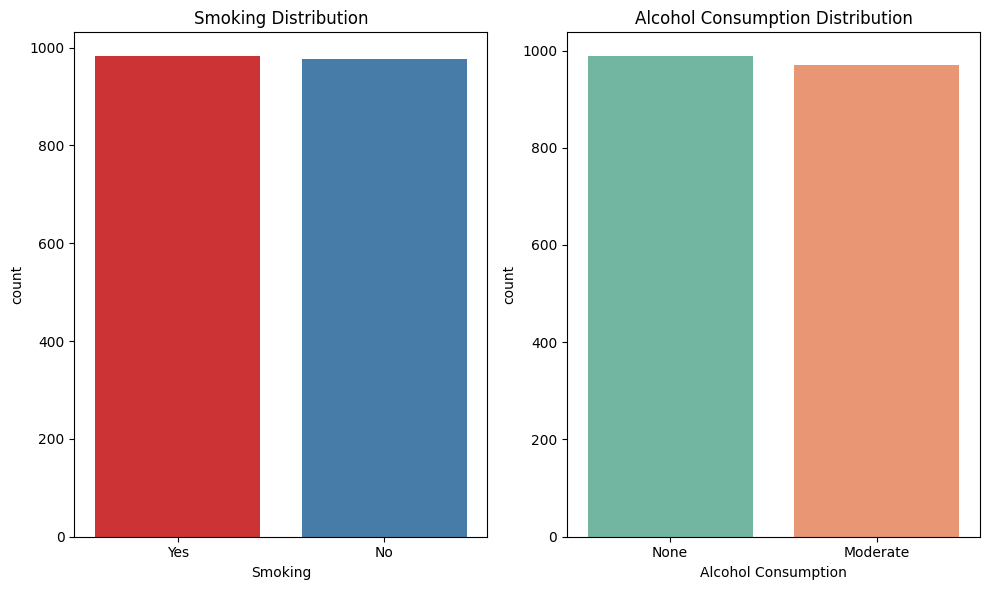

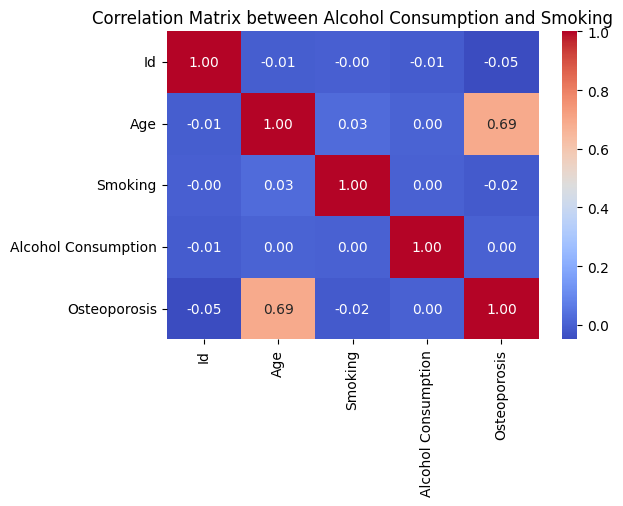

In [ ]:
# Section 4: Alcohol and Smoking (Yonnie)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive


# Mount Google Drive
# drive.mount('/content/drive')


# df = pd.read_csv('/content/drive/MyDrive/osteoporosis.csv')
df_original = df.copy()
print (df.shape)
df

# Replace NaN values with "None" in the "Alcohol Consumption" column
df['Alcohol Consumption'].fillna('None', inplace=True)

# Count the numbers of "None" and "Moderate" in the "Alcohol Consumption" column
alcohol_counts = df['Alcohol Consumption'].value_counts()

print("Count of 'None' in Alcohol Consumption column:", alcohol_counts.get('None', 0))
print("Count of 'Moderate' in Alcohol Consumption column:", alcohol_counts.get('Moderate', 0))

# Count the numbers of "Yes" and "No" in the "Smoking" column
smoking_counts = df['Smoking'].value_counts()

print("Count of 'Yes' in Smoking column:", smoking_counts.get('Yes', 0))
print("Count of 'No' in Smoking column:", smoking_counts.get('No', 0))

# Data visualization
plt.figure(figsize=(10, 6))

# Plot for Smoking
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Smoking', palette='Set1')
plt.title('Smoking Distribution')

# Plot for Alcohol Consumption
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Alcohol Consumption', order=['None', 'Moderate'], palette='Set2')
plt.title('Alcohol Consumption Distribution')

plt.tight_layout()
plt.show()

# Convert categorical variables to numerical representations
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['Alcohol Consumption'] = df['Alcohol Consumption'].map({'Moderate': 1, 'None': 0})

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['int', 'float'])

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Alcohol Consumption and Smoking')
plt.show()

#1 indicates a perfect positive correlation. 0 indicates no correlation.-1 indicates a negative correlation.

Medical Conditions
647
Medications
985
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   int64 
 11  Alcohol Consumption  1958 non-null   int64 
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis    

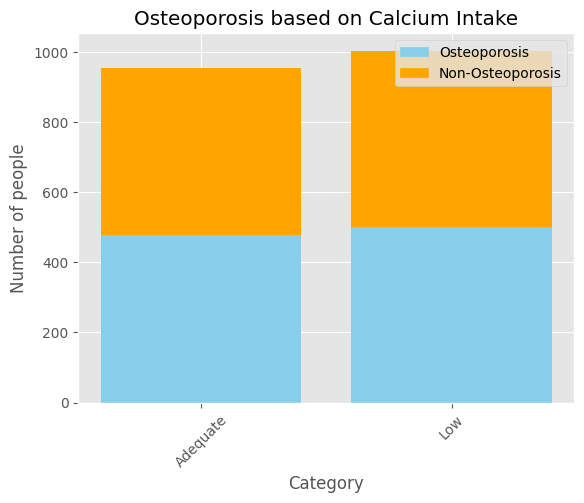

The max rate of Osteoporosis in the  Calcium Intake  column is:    Calcium Intake
0       Adequate

-------------------------------------------------------------------------------------------------

  Vitamin D Intake  Osteoporosis
0     Insufficient           465
1       Sufficient           514
  Vitamin D Intake  Osteoporosis
0     Insufficient           947
1       Sufficient          1011
Rates:
0    49.102429
1    50.840752
Name: Osteoporosis, dtype: float64


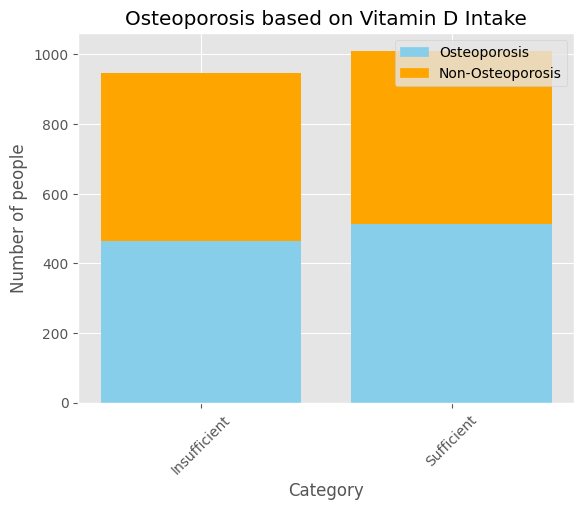

The max rate of Osteoporosis in the  Vitamin D Intake  column is:    Vitamin D Intake
1       Sufficient

-------------------------------------------------------------------------------------------------

  Hormonal Changes  Osteoporosis
0           Normal           483
1   Postmenopausal           496
  Hormonal Changes  Osteoporosis
0           Normal           981
1   Postmenopausal           977
Rates:
0    49.235474
1    50.767656
Name: Osteoporosis, dtype: float64


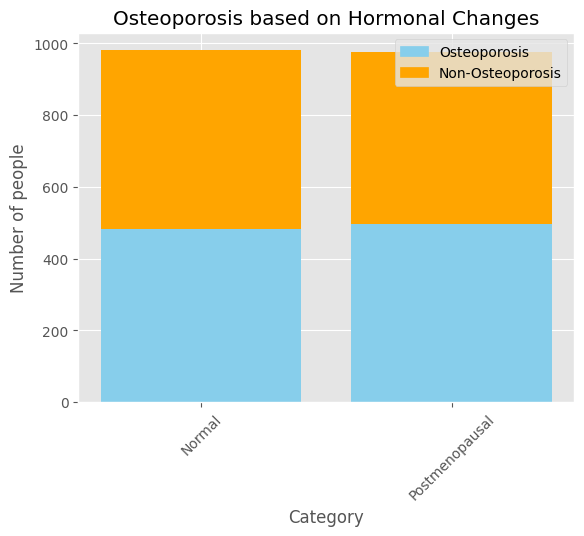

The max rate of Osteoporosis in the  Hormonal Changes  column is:    Hormonal Changes
1   Postmenopausal

-------------------------------------------------------------------------------------------------


*************************************************************************************************
*************************************************************************************************
New Analysis with the altered DataFrame that has age less than 40.
*************************************************************************************************
*************************************************************************************************


  Calcium Intake  Osteoporosis
0       Adequate           154
1            Low           149
  Calcium Intake  Osteoporosis
0       Adequate           629
1            Low           653
Rates:
0    24.483307
1    22.817764
Name: Osteoporosis, dtype: float64


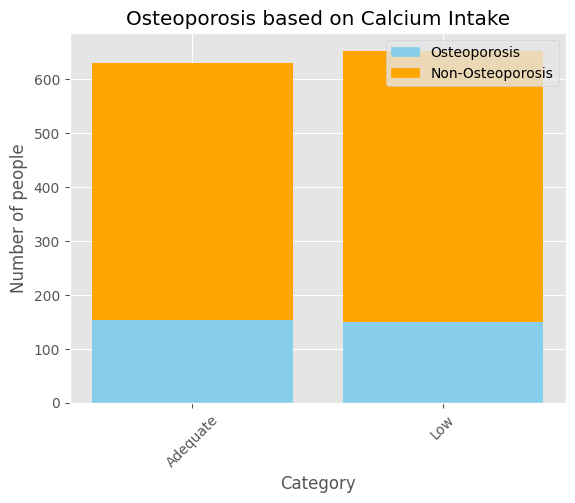

The max rate of Osteoporosis in the  Calcium Intake  column is:    Calcium Intake
0       Adequate

-------------------------------------------------------------------------------------------------

  Vitamin D Intake  Osteoporosis
0     Insufficient           144
1       Sufficient           159
  Vitamin D Intake  Osteoporosis
0     Insufficient           626
1       Sufficient           656
Rates:
0    23.003195
1    24.237805
Name: Osteoporosis, dtype: float64


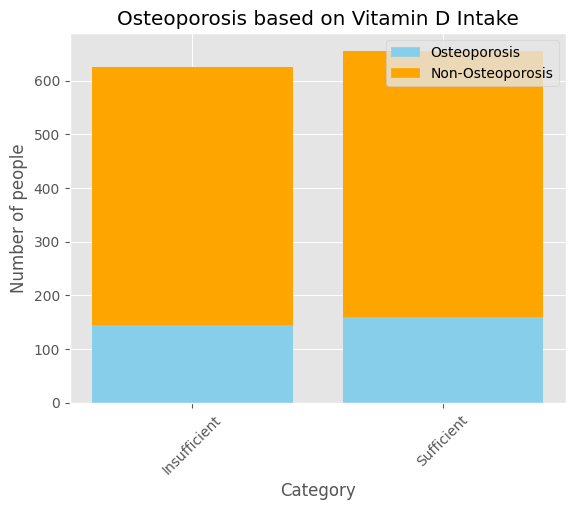

The max rate of Osteoporosis in the  Vitamin D Intake  column is:    Vitamin D Intake
1       Sufficient

-------------------------------------------------------------------------------------------------

  Hormonal Changes  Osteoporosis
0           Normal           153
1   Postmenopausal           150
  Hormonal Changes  Osteoporosis
0           Normal           651
1   Postmenopausal           631
Rates:
0    23.502304
1    23.771791
Name: Osteoporosis, dtype: float64


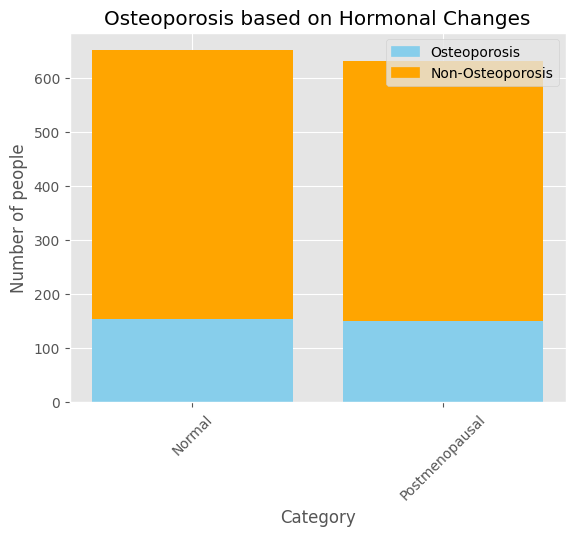

The max rate of Osteoporosis in the  Hormonal Changes  column is:    Hormonal Changes
1   Postmenopausal

-------------------------------------------------------------------------------------------------


*************************************************************************************************
*************************************************************************************************
New Analysis with the altered DataFrame that has an equal number of people with and without osteoporosis.
*************************************************************************************************
*************************************************************************************************


Number of rows with Osteoporosis = 1: 734
Number of rows with Osteoporosis = 0: 734
The new balanced_df has an equal number, and it is created with replace=False which means that each sample that is taken from original DF will not be considered later.

-----------------------------------------

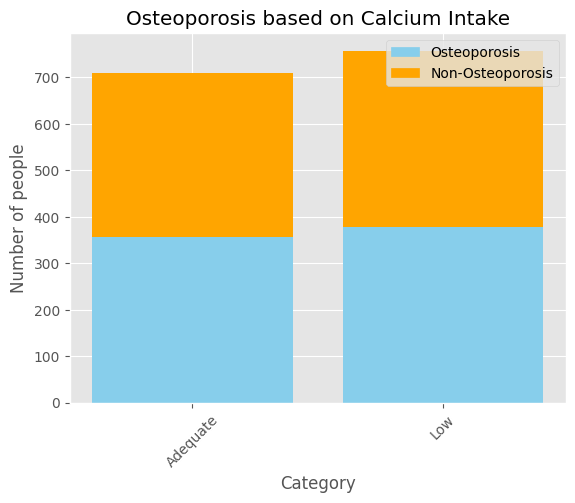

The max rate of Osteoporosis in the  Calcium Intake  column is:    Calcium Intake
0       Adequate

-------------------------------------------------------------------------------------------------

  Vitamin D Intake  Osteoporosis
0     Insufficient           360
1       Sufficient           374
  Vitamin D Intake  Osteoporosis
0     Insufficient           728
1       Sufficient           740
Rates:
0    49.450549
1    50.540541
Name: Osteoporosis, dtype: float64


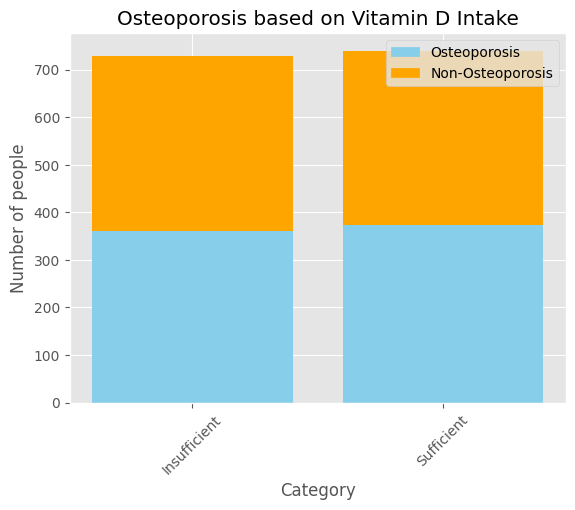

The max rate of Osteoporosis in the  Vitamin D Intake  column is:    Vitamin D Intake
1       Sufficient

-------------------------------------------------------------------------------------------------

  Hormonal Changes  Osteoporosis
0           Normal           366
1   Postmenopausal           368
  Hormonal Changes  Osteoporosis
0           Normal           743
1   Postmenopausal           725
Rates:
0    49.259758
1    50.758621
Name: Osteoporosis, dtype: float64


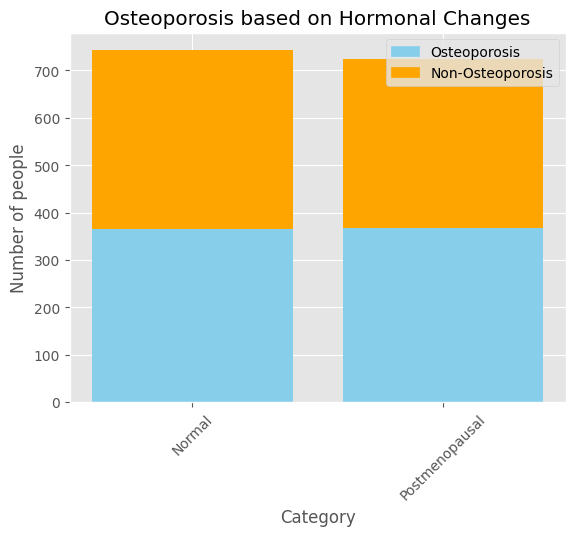

The max rate of Osteoporosis in the  Hormonal Changes  column is:    Hormonal Changes
1   Postmenopausal

-------------------------------------------------------------------------------------------------



In [ ]:
# Section 5: Calcium, Vitamin D and Hormonal Changes (Ali)
import matplotlib.patches as mpatches

# Find out which columns have missing values.
for c in df.columns:
    if df[c].isnull().sum():
        print(c)
        print(df[c].isnull().sum())

df.info()

def getAnalysis(MyDF):
    for column in MyDF[['Calcium Intake', 'Vitamin D Intake', 'Hormonal Changes']]:
        grouped_osteoporosis = MyDF.groupby(column, observed=False)['Osteoporosis'].sum().reset_index()
        print (grouped_osteoporosis)
        # print("not:", grouped_not_osteoporosis)
        grouped_total = MyDF.groupby(column, observed=False)['Osteoporosis'].count().reset_index()
        print (grouped_total)
        grouped_osteoporosis_rate = grouped_osteoporosis['Osteoporosis'] / grouped_total['Osteoporosis'] # Find the Osteoporosis rate for this group
        print ("Rates:")
        print (grouped_osteoporosis_rate * 100)

        nonOstep = grouped_total.iloc[:, 1] - grouped_osteoporosis.iloc[:, 1]

        plt.bar(grouped_osteoporosis.iloc[:, 0], grouped_osteoporosis.iloc[:, 1], color='skyblue')
        plt.bar(grouped_osteoporosis.iloc[:, 0], nonOstep, color='orange', bottom=grouped_osteoporosis.iloc[:, 1])

        # Adding labels and title
        plt.xlabel('Category')
        plt.ylabel('Number of people')
        plt.title('Osteoporosis based on '+ column)

        # Rotating x-axis labels for better readability (optional)
        plt.xticks(rotation=45)

        # Create custom legend using Patch objects
        legend_handles = [
            mpatches.Patch(color='skyblue', label='Osteoporosis'),
            mpatches.Patch(color='orange', label='Non-Osteoporosis')
        ]

        # Display the custom legend
        plt.legend(handles=legend_handles)

        # Display the plot
        plt.show()

        # Find the indices of the highest Osteoporosis rates (multiple if the same)
        max_indices = grouped_osteoporosis_rate[grouped_osteoporosis_rate == grouped_osteoporosis_rate.max()].index
        # Find the values and print.
        max_category_values = grouped_osteoporosis.loc[max_indices, [column]]
        print("The max rate of Osteoporosis in the ", column, " column is: ", max_category_values)
        print ("\n-------------------------------------------------------------------------------------------------\n")

print ("\n*************************************************************************************************")
print ("*************************************************************************************************")
print ("Analysis with the original DataFrame.")
print ("*************************************************************************************************")
print ("*************************************************************************************************\n\n")

# Get the analysis with the original DataFrame
getAnalysis(df)

print ("\n*************************************************************************************************")
print ("*************************************************************************************************")
print ("New Analysis with the altered DataFrame that has age less than 40.")
print ("*************************************************************************************************")
print ("*************************************************************************************************\n\n")

# Get the analysis with the altered DataFrame that has age less than 40.
filtered_df = df[df['Age'] <= 40]
getAnalysis(filtered_df)

print ("\n*************************************************************************************************")
print ("*************************************************************************************************")
print ("New Analysis with the altered DataFrame that has an equal number of people with and without osteoporosis.")
print ("*************************************************************************************************")
print ("*************************************************************************************************\n\n")

# Get the analysis with the altered DataFrame that has an equal number of people with and without osteoporosis.
# Calculate the number of rows to sample (75% of the original data)
sample_size = int(len(df) * 0.75)
# Separate rows based on osteoporosis status
osteoporosis_yes = df[df['Osteoporosis'] == 1]
osteoporosis_no = df[df['Osteoporosis'] == 0]
# Randomly sample from each group to achieve 50% osteoporosis and 50% non-osteoporosis
sampled_yes = osteoporosis_yes.sample(n=sample_size // 2, replace=False, random_state=42)
sampled_no = osteoporosis_no.sample(n=sample_size // 2, replace=False, random_state=42)
# Concatenate the sampled dataframes
balanced_df = pd.concat([sampled_yes, sampled_no])
# Count the number of rows with 'Osteoporosis' == 1 (presence of osteoporosis)
num_osteoporosis_yes = balanced_df['Osteoporosis'].sum()  # Sum of 1s (True values) in the 'Osteoporosis' column
# Count the number of rows with 'Osteoporosis' == 0 (absence of osteoporosis)
num_osteoporosis_no = len(balanced_df) - num_osteoporosis_yes  # Total rows minus the number of 1s
print("Number of rows with Osteoporosis = 1:", num_osteoporosis_yes)
print("Number of rows with Osteoporosis = 0:", num_osteoporosis_no)
print("The new balanced_df has an equal number, and it is created with replace=False which means that each sample that is taken from original DF will not be considered later.")
print ("\n----------------------------------------------------------------------------\n")
getAnalysis (balanced_df)

In [ ]:
# Section 6: Bodyweight, Physical Activity and Medical Condition (Amro negm)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
!pip install h2o
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator, H2OGradientBoostingEstimator

df = pd.read_csv('osteoporosis.csv')

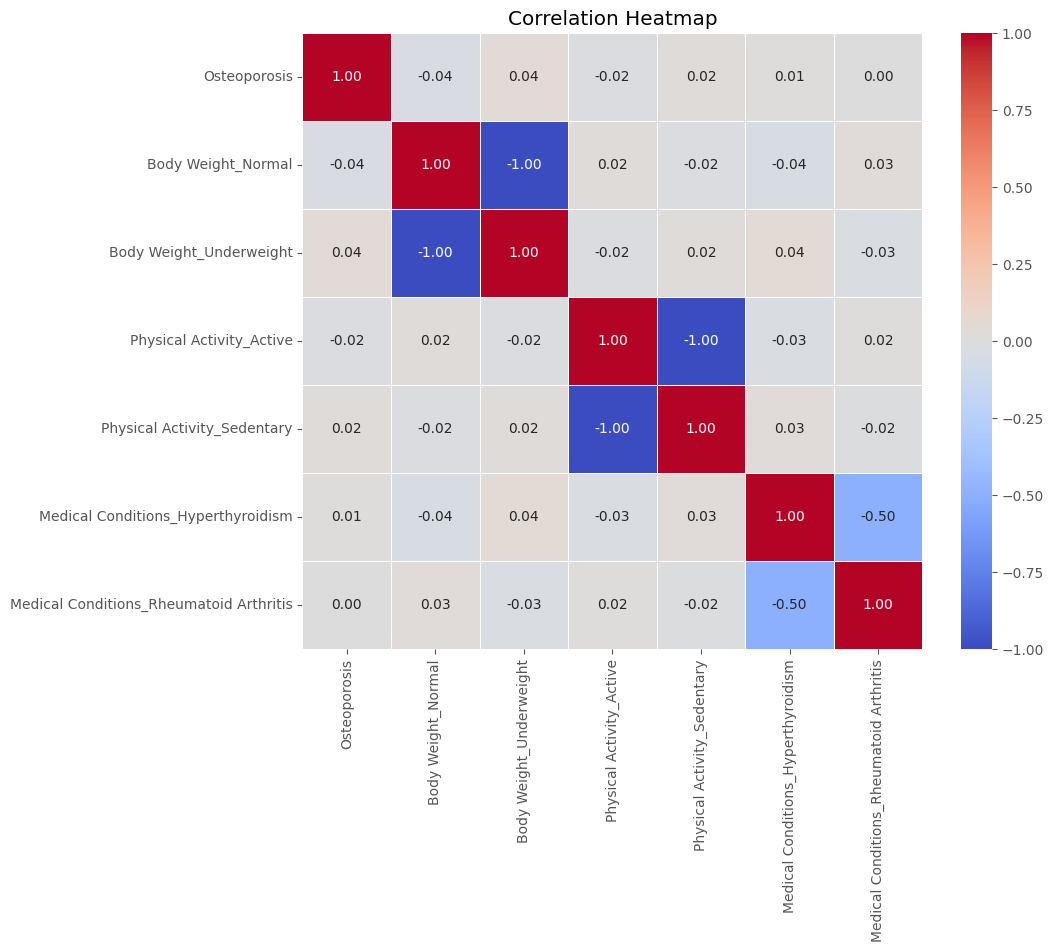

In [ ]:
# Convert 'Osteoporosis' to binary (0 or 1)
df['Osteoporosis'] = df['Osteoporosis'].astype(int)

# Select the columns of interest
df_subset = df[['Body Weight', 'Physical Activity', 'Medical Conditions', 'Osteoporosis']]

# Convert categorical variables to numerical using one-hot encoding
df_subset = pd.get_dummies(df_subset)

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

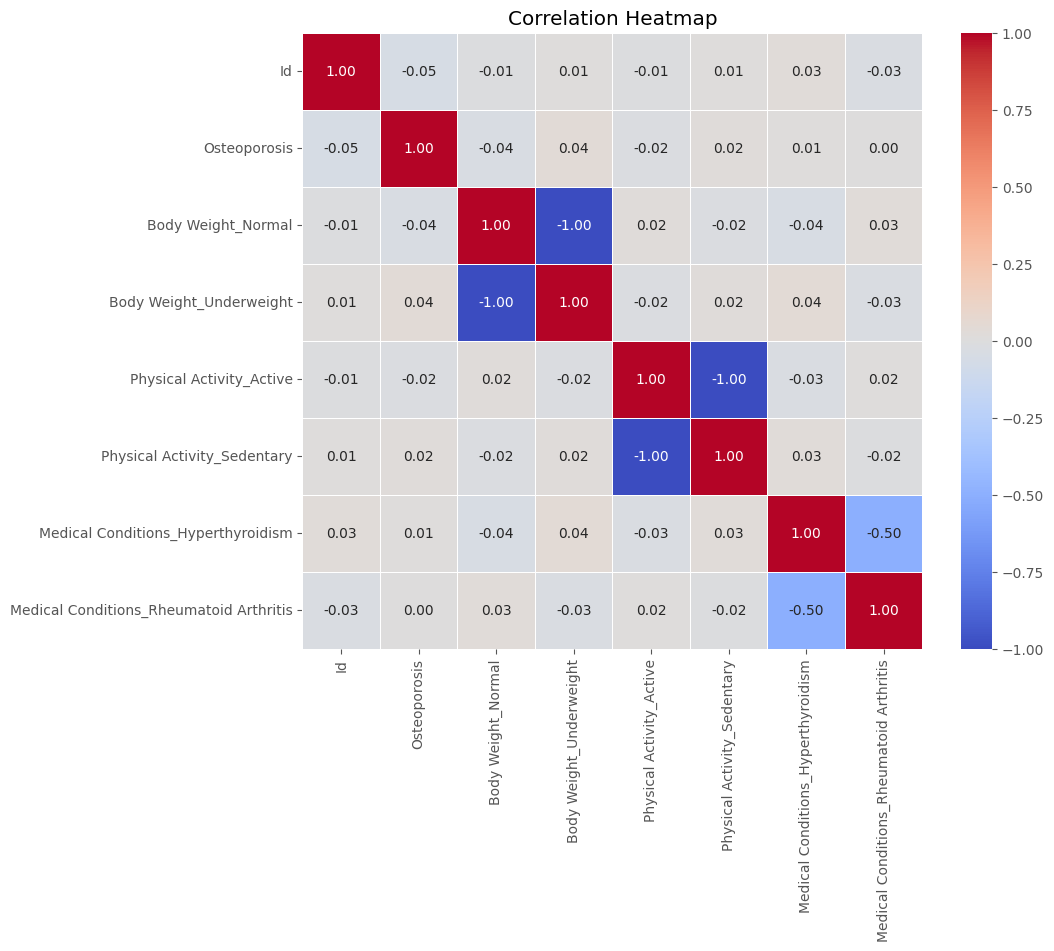

In [ ]:
columns_of_interest = ['Id', 'Osteoporosis', 'Body Weight', 'Physical Activity', 'Medical Conditions']
df_subset = df[columns_of_interest]

# Convert categorical variables to numerical using one-hot encoding
df_subset = pd.get_dummies(df_subset)

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

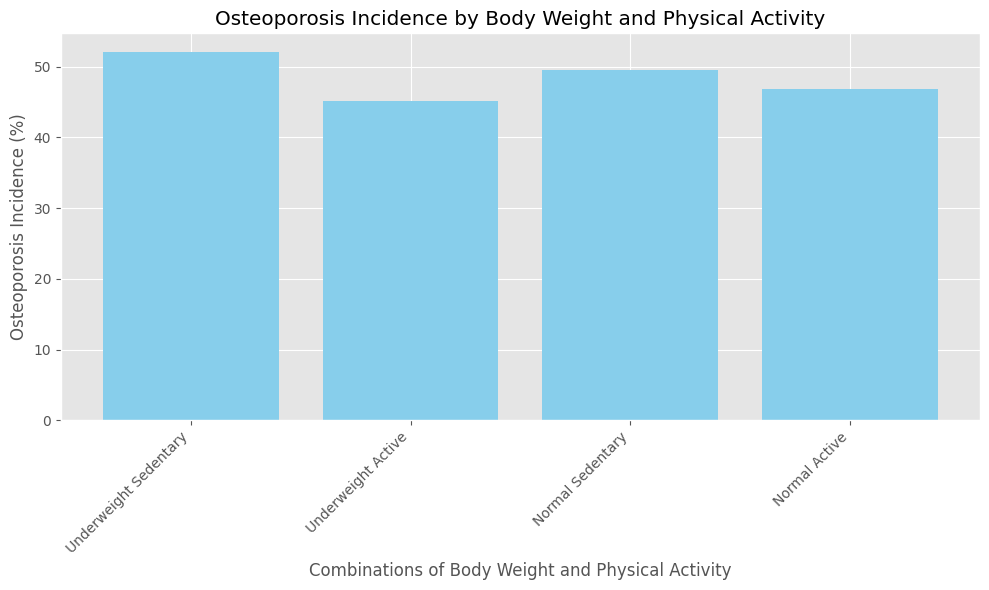

In [ ]:
# Data for the combinations and their respective osteoporosis incidence percentages
combinations = ['Underweight Sedentary', 'Underweight Active', 'Normal Sedentary', 'Normal Active']
incidence_percentages = [52.1, 45.2, 49.5, 46.9]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(combinations, incidence_percentages, color='skyblue')

# Adding title and labels
plt.title('Osteoporosis Incidence by Body Weight and Physical Activity')
plt.xlabel('Combinations of Body Weight and Physical Activity')
plt.ylabel('Osteoporosis Incidence (%)')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Section 7 :Predictive Modeling (Muneeb)

In [ ]:
NAME = "Muneeb Zafar Khan"

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns

In [ ]:
#uploading the file run the code and upload the osteoporosis.csv file
# use this if the other method does not work

#from google.colab import files
#uploaded = files.upload()

In [ ]:
osteo_df = pd.read_csv('osteoporosis.csv')

In [ ]:
osteo_df

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,1991635,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,1528601,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,1990957,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,1779848,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [ ]:
#removing the ID column as it is not necessary for the model
osteo_df.drop(columns=['Id'], inplace=True)

In [ ]:
osteo_df

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [ ]:
#checking if any columns contain null values
osteo_df.isnull().sum()

Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [ ]:
# observing the NaN values in Alcohol Consumption , Medical Conditions and Medications column,
# it is evident that  all NaN values are not actually missing values, but
# are instances where the medical condition is absent
# therefore, rplacing all NaN values in the specified columns to 0 and non-NaN values to 1
# 0 in Alcohol Consumption means does not consume alcohol and 1 means consumes alcohol
# 0 in Medical Conditions means no  medical condition  and 1 meaning condition present
# 0 in Medications no medications and 1 meaning taking medications

In [ ]:
osteo_df['Alcohol Consumption'].unique()

array(['Moderate', nan], dtype=object)

In [ ]:
osteo_df['Alcohol Consumption'] = osteo_df['Alcohol Consumption'].fillna(0).replace('Moderate', 1)

In [ ]:
osteo_df['Medical Conditions'].unique()

array(['Rheumatoid Arthritis', nan, 'Hyperthyroidism'], dtype=object)

In [ ]:
osteo_df['Medical Conditions'] = osteo_df['Medical Conditions'].replace(np.nan, 0)
osteo_df['Medical Conditions'] = osteo_df['Medical Conditions'].replace('Hyperthyroidism', 1)
osteo_df['Medical Conditions'] = osteo_df['Medical Conditions'].replace('Rheumatoid Arthritis', 1)

In [ ]:
osteo_df['Medications'].unique()

array(['Corticosteroids', nan], dtype=object)

In [ ]:
osteo_df['Medications'] = osteo_df['Medications'].fillna(0).replace('Corticosteroids', 1)

In [ ]:
osteo_df.isnull().sum()

Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

In [ ]:
osteo_df

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,1,1,1,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,0,0,0,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,1,1,1,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,0,1,1,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,0,1,0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,1,1,0,Yes,0
1954,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,0,0,1,No,0
1955,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,0,1,0,No,0
1956,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,0,1,1,Yes,0


In [ ]:
osteo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1958 non-null   int64 
 1   Gender               1958 non-null   object
 2   Hormonal Changes     1958 non-null   object
 3   Family History       1958 non-null   object
 4   Race/Ethnicity       1958 non-null   object
 5   Body Weight          1958 non-null   object
 6   Calcium Intake       1958 non-null   object
 7   Vitamin D Intake     1958 non-null   object
 8   Physical Activity    1958 non-null   object
 9   Smoking              1958 non-null   object
 10  Alcohol Consumption  1958 non-null   int64 
 11  Medical Conditions   1958 non-null   int64 
 12  Medications          1958 non-null   int64 
 13  Prior Fractures      1958 non-null   object
 14  Osteoporosis         1958 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 229.6+ KB


In [ ]:
# Creating binary columns for Hormonal Changes bins
osteo_df['Normal_Hormones'] = osteo_df['Hormonal Changes'].apply(lambda x: 1 if x == 'Normal' else 0)
osteo_df['Postmenopausal'] = osteo_df['Hormonal Changes'].apply(lambda x: 1 if x == 'Postmenopausal' else 0)
# Moving Hormonal Changes bins next to the Hormonal Changes column for readability and easy comparison
osteo_df = pd.concat([osteo_df[['Hormonal Changes', 'Normal_Hormones', 'Postmenopausal']], osteo_df.drop(['Hormonal Changes', 'Normal_Hormones', 'Postmenopausal'], axis=1)], axis=1)

# Creating binary columns for Gender bins
osteo_df['Male'] = osteo_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
osteo_df['Female'] = osteo_df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

osteo_df = pd.concat([osteo_df[['Gender', 'Male', 'Female']], osteo_df.drop(['Gender', 'Male', 'Female'], axis=1)], axis=1)

# Creating binary columns for Age bins
osteo_df['Age<50'] = osteo_df['Age'].apply(lambda x: 1 if x < 50 else 0)
osteo_df['Age>=50'] = osteo_df['Age'].apply(lambda x: 1 if x >= 50 else 0)


# Moving Age bins next to the Age column for readability and easy comparison
osteo_df = pd.concat([osteo_df[['Age', 'Age<50', 'Age>=50']], osteo_df.drop(['Age', 'Age<50', 'Age>=50'], axis=1)], axis=1)





In [ ]:
osteo_df

,Age,Age<50,Age>=50,Gender,Male,Female,Hormonal Changes,Normal_Hormones,Postmenopausal,Family History,...,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,1,Female,0,1,Normal,1,0,Yes,...,Underweight,Low,Sufficient,Sedentary,Yes,1,1,1,Yes,1
1,32,1,0,Female,0,1,Normal,1,0,Yes,...,Underweight,Low,Sufficient,Sedentary,No,0,0,0,Yes,1
2,89,0,1,Female,0,1,Postmenopausal,0,1,No,...,Normal,Adequate,Sufficient,Active,No,1,1,1,No,1
3,78,0,1,Female,0,1,Normal,1,0,No,...,Underweight,Adequate,Insufficient,Sedentary,Yes,0,1,1,No,1
4,38,1,0,Male,1,0,Postmenopausal,0,1,Yes,...,Normal,Low,Sufficient,Active,Yes,0,1,0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,1,0,Female,0,1,Normal,1,0,Yes,...,Normal,Adequate,Sufficient,Sedentary,Yes,1,1,0,Yes,0
1954,23,1,0,Female,0,1,Postmenopausal,0,1,Yes,...,Underweight,Low,Insufficient,Active,No,0,0,1,No,0
1955,34,1,0,Female,0,1,Postmenopausal,0,1,No,...,Underweight,Low,Sufficient,Sedentary,No,0,1,0,No,0
1956,25,1,0,Male,1,0,Postmenopausal,0,1,No,...,Normal,Low,Insufficient,Sedentary,Yes,0,1,1,Yes,0


In [ ]:
# renaming specific columns to avoid errors
osteo_df.rename(columns={"Body Weight": "BodyWeight", "Calcium Intake": "CalciumIntake", "Vitamin D Intake":"VitD","Physical Activity":"PhysicalActivity", "Alcohol Consumption":"AlcoholConsumption", "Medical Conditions":"MedicalConditions", "Prior Fractures":"Fractures", "Family History" : "FamilyHistory"  }, inplace=True)


In [ ]:
# checking FamilyHistory values and replacing them with 0's and 1's
osteo_df['FamilyHistory'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
osteo_df['FamilyHistory'] = osteo_df['FamilyHistory'].fillna(0).replace({'Yes': 1, 'No': 0})
osteo_df['FamilyHistory'].unique()

array([1, 0])

In [ ]:
# checking BodyWeight values and replacing them with 0's and 1's

osteo_df['BodyWeight'].unique()

array(['Underweight', 'Normal'], dtype=object)

In [ ]:
osteo_df['BodyWeight'] = osteo_df['BodyWeight'].fillna(0).replace({'Underweight': 1, 'Normal': 0})


In [ ]:
osteo_df['BodyWeight'].unique()

array([1, 0])

In [ ]:
# checking CalciumIntake values and replacing them with 0's and 1's

osteo_df['CalciumIntake'].unique()

array(['Low', 'Adequate'], dtype=object)

In [ ]:
osteo_df['CalciumIntake'] = osteo_df['CalciumIntake'].fillna(0).replace({'Low': 1, 'Adequate': 0})
osteo_df['CalciumIntake'].unique()

array([1, 0])

In [ ]:
# checking VitD values and replacing them with 0's and 1's

osteo_df['VitD'].unique()

array(['Sufficient', 'Insufficient'], dtype=object)

In [ ]:
osteo_df['VitD'] = osteo_df['VitD'].fillna(0).replace({'Insufficient': 1, 'Sufficient': 0})
osteo_df['VitD'].unique()

array([0, 1])

In [ ]:
# checking PhysicalActivity values and replacing them with 0's and 1's


In [ ]:
osteo_df['PhysicalActivity'].unique()

array(['Sedentary', 'Active'], dtype=object)

In [ ]:
osteo_df['PhysicalActivity'] = osteo_df['PhysicalActivity'].fillna(0).replace({'Sedentary': 1, 'Active': 0})
osteo_df['PhysicalActivity'].unique()

array([1, 0])

In [ ]:
# checking AlcoholConsumption values and replacing them with 0's and 1's

osteo_df['AlcoholConsumption'].unique()

array([1, 0])

In [ ]:
osteo_df['MedicalConditions'].unique()

array([1, 0])

In [ ]:
# checking Fractures values and replacing them with 0's and 1's

osteo_df['Fractures'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
osteo_df['Fractures'] = osteo_df['Fractures'].fillna(0).replace({'Yes': 1, 'No': 0})
osteo_df['Fractures'].unique()

array([1, 0])

In [ ]:
# checking Smoking values and replacing them with 0's and 1's

osteo_df['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
osteo_df['Smoking'] = osteo_df['Smoking'].fillna(0).replace({'Yes': 1, 'No': 0})
osteo_df['Smoking'].unique()

array([1, 0])

In [ ]:
# checking if values in all necessary columns are replaced with 0's and 1's
osteo_df

,Age,Age<50,Age>=50,Gender,Male,Female,Hormonal Changes,Normal_Hormones,Postmenopausal,FamilyHistory,...,BodyWeight,CalciumIntake,VitD,PhysicalActivity,Smoking,AlcoholConsumption,MedicalConditions,Medications,Fractures,Osteoporosis
0,69,0,1,Female,0,1,Normal,1,0,1,...,1,1,0,1,1,1,1,1,1,1
1,32,1,0,Female,0,1,Normal,1,0,1,...,1,1,0,1,0,0,0,0,1,1
2,89,0,1,Female,0,1,Postmenopausal,0,1,0,...,0,0,0,0,0,1,1,1,0,1
3,78,0,1,Female,0,1,Normal,1,0,0,...,1,0,1,1,1,0,1,1,0,1
4,38,1,0,Male,1,0,Postmenopausal,0,1,1,...,0,1,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,1,0,Female,0,1,Normal,1,0,1,...,0,0,0,1,1,1,1,0,1,0
1954,23,1,0,Female,0,1,Postmenopausal,0,1,1,...,1,1,1,0,0,0,0,1,0,0
1955,34,1,0,Female,0,1,Postmenopausal,0,1,0,...,1,1,0,1,0,0,1,0,0,0
1956,25,1,0,Male,1,0,Postmenopausal,0,1,0,...,0,1,1,1,1,0,1,1,1,0


In [ ]:
osteo_df.isnull().sum()

Age                   0
Age<50                0
Age>=50               0
Gender                0
Male                  0
Female                0
Hormonal Changes      0
Normal_Hormones       0
Postmenopausal        0
FamilyHistory         0
Race/Ethnicity        0
BodyWeight            0
CalciumIntake         0
VitD                  0
PhysicalActivity      0
Smoking               0
AlcoholConsumption    0
MedicalConditions     0
Medications           0
Fractures             0
Osteoporosis          0
dtype: int64

In [ ]:
osteo_df

,Age,Age<50,Age>=50,Gender,Male,Female,Hormonal Changes,Normal_Hormones,Postmenopausal,FamilyHistory,...,BodyWeight,CalciumIntake,VitD,PhysicalActivity,Smoking,AlcoholConsumption,MedicalConditions,Medications,Fractures,Osteoporosis
0,69,0,1,Female,0,1,Normal,1,0,1,...,1,1,0,1,1,1,1,1,1,1
1,32,1,0,Female,0,1,Normal,1,0,1,...,1,1,0,1,0,0,0,0,1,1
2,89,0,1,Female,0,1,Postmenopausal,0,1,0,...,0,0,0,0,0,1,1,1,0,1
3,78,0,1,Female,0,1,Normal,1,0,0,...,1,0,1,1,1,0,1,1,0,1
4,38,1,0,Male,1,0,Postmenopausal,0,1,1,...,0,1,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,1,0,Female,0,1,Normal,1,0,1,...,0,0,0,1,1,1,1,0,1,0
1954,23,1,0,Female,0,1,Postmenopausal,0,1,1,...,1,1,1,0,0,0,0,1,0,0
1955,34,1,0,Female,0,1,Postmenopausal,0,1,0,...,1,1,0,1,0,0,1,0,0,0
1956,25,1,0,Male,1,0,Postmenopausal,0,1,0,...,0,1,1,1,1,0,1,1,1,0


In [ ]:
print(osteo_df.columns.to_list())

['Age', 'Age<50', 'Age>=50', 'Gender', 'Male', 'Female', 'Hormonal Changes', 'Normal_Hormones', 'Postmenopausal', 'FamilyHistory', 'Race/Ethnicity', 'BodyWeight', 'CalciumIntake', 'VitD', 'PhysicalActivity', 'Smoking', 'AlcoholConsumption', 'MedicalConditions', 'Medications', 'Fractures', 'Osteoporosis']


In [ ]:
# HighOsteoProbability column will contain True if the corresponding age is greater than 50, indicating a high osteoporosis probability, and False otherwise.
#This column can be used as the target variable (y) in a machine learning model

osteo_df['HighOsteoProbability'] = (osteo_df['Age'] > 50)

In [ ]:
#osteo_df['HighOsteoProbability']

In [ ]:
osteo_df

,Age,Age<50,Age>=50,Gender,Male,Female,Hormonal Changes,Normal_Hormones,Postmenopausal,FamilyHistory,...,CalciumIntake,VitD,PhysicalActivity,Smoking,AlcoholConsumption,MedicalConditions,Medications,Fractures,Osteoporosis,HighOsteoProbability
0,69,0,1,Female,0,1,Normal,1,0,1,...,1,0,1,1,1,1,1,1,1,True
1,32,1,0,Female,0,1,Normal,1,0,1,...,1,0,1,0,0,0,0,1,1,False
2,89,0,1,Female,0,1,Postmenopausal,0,1,0,...,0,0,0,0,1,1,1,0,1,True
3,78,0,1,Female,0,1,Normal,1,0,0,...,0,1,1,1,0,1,1,0,1,True
4,38,1,0,Male,1,0,Postmenopausal,0,1,1,...,1,0,0,1,0,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,1,0,Female,0,1,Normal,1,0,1,...,0,0,1,1,1,1,0,1,0,False
1954,23,1,0,Female,0,1,Postmenopausal,0,1,1,...,1,1,0,0,0,0,1,0,0,False
1955,34,1,0,Female,0,1,Postmenopausal,0,1,0,...,1,0,1,0,0,1,0,0,0,False
1956,25,1,0,Male,1,0,Postmenopausal,0,1,0,...,1,1,1,1,0,1,1,1,0,False


In [ ]:
#verifying that there are ony two unique variables: True and False
osteo_df['HighOsteoProbability'].unique()

array([ True, False])

In [ ]:
#osteo_df.columns.tolist()

In [ ]:
# just to make sure that the results add 1958 i.e, the number of rows
print((osteo_df['Age'] < 50).sum() + (osteo_df['Age'] >= 50).sum())


1958


In [ ]:
#This code was intended to split the variables based on age binning age < 50 and age >= 50. However decided not to go ahead because of low accuracy


#X = osteo_df[['Age<50','Age>=50','Male', 'Female','Normal_Hormones','Postmenopausal', 'FamilyHistory', 'BodyWeight', 'CalciumIntake', 'VitD', 'PhysicalActivity', 'Smoking', 'AlcoholConsumption', 'MedicalConditions', 'Medications', 'Fractures', ]]
#y = osteo_df["HighOsteoProbability"]
#y = osteo_df["Osteoporosis"]
#y = osteo_df['Age']

#splitting the dataset into training and testing sets for both the features and the target variable,
#and then printing the shapes of these sets

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)


#making predictions using the trained random forest classifier


#y_pred = rf_clf.predict(X_test) #make predictions for the test set
#print(y_pred.shape)
#y_pred #these are the predictions made by the model

# evaluating the accuracy of the model's predictions on the testing data and provides insights into the distribution of the target variable in the testing set.
#The accuracy score indicates how well the model performs overall,
#the distribution of the target variable helps understand the class balance in the test set.

# Xuan's pro way to check for accuracy:
#from sklearn.metrics import accuracy_score
#print(accuracy_score(y_test, y_pred))

Splitting the data independent variables X , and   target variable y.

In [ ]:
X = osteo_df[['Age','Male', 'Female','Normal_Hormones','Postmenopausal', 'FamilyHistory', 'BodyWeight', 'CalciumIntake', 'VitD', 'PhysicalActivity', 'Smoking', 'AlcoholConsumption', 'MedicalConditions', 'Medications', 'Fractures', ]]
y = osteo_df["Osteoporosis"]

In [ ]:
#X = osteo_df[['Age<50','Age>=50','Male', 'Female','Normal_Hormones','Postmenopausal', 'FamilyHistory', 'BodyWeight', 'CalciumIntake', 'VitD', 'PhysicalActivity', 'Smoking', 'AlcoholConsumption', 'MedicalConditions', 'Medications', 'Fractures', ]]
#y = osteo_df["Osteoporosis"]

In [ ]:
#osteo_df

In [ ]:
print(X.shape)
print(y.shape)


(1958, 15)
(1958,)


In [ ]:
#splitting the dataset into training and testing sets for both the features and the target variable,
#and then printing the shapes of these sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1566, 15)
(392, 15)
(1566,)
(392,)


In [ ]:
#Utilizing RandomForestClassifier from scikit-learn to train a random forest classifier model on the training data
# executing this code, so the rf_clf object will be a trained random forest classifier model,  to make predictions on new data

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1) #create an instance of the model
rf_clf.fit(X_train, y_train) #train the model on the training set

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [ ]:
#making predictions using the trained random forest classifier


y_pred = rf_clf.predict(X_test) #make predictions for the test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(392,)


array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
(y_pred == y_test).sum()

329

In [ ]:
# evaluating the accuracy of the model's predictions on the testing data and provides insights into the distribution of the target variable in the testing set.
#The accuracy score indicates how well the model performs overall,
#the distribution of the target variable helps understand the class balance in the test set.

# Xuan's pro way to check for accuracy:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8392857142857143


Conclusion: The test results are promising. With 86% accuracy this model can be used for determining the probability of person having Osteoporosis based on factors such as Age, Gender and Previous Medical History

In [ ]:

y_test.value_counts()

Osteoporosis
0    204
1    188
Name: count, dtype: int64

In [ ]:
y_test.value_counts()[0]/y_test.value_counts().sum()

0.5204081632653061

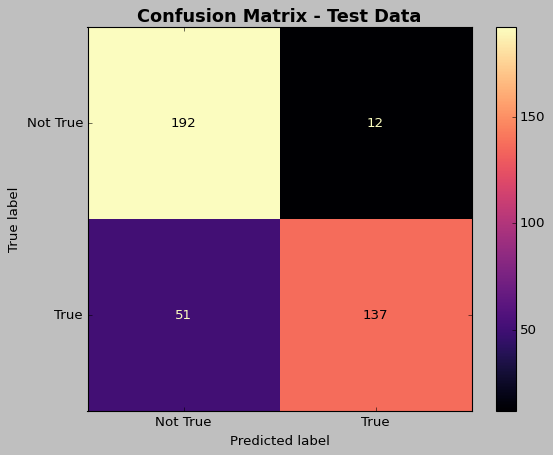

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.style.use('classic')

disp = ConfusionMatrixDisplay.from_estimator(
    rf_clf,
    X_test,
    y_test,
    display_labels=["Not True", "True"],
    cmap=plt.cm.magma,
    normalize=None,
)

disp.ax_.set_title("Confusion Matrix - Test Data", fontsize=16, fontweight='bold')

disp.ax_.tick_params(axis='x', labelsize=12)
disp.ax_.tick_params(axis='y', labelsize=12)

disp.ax_.grid(False)

plt.show()


Feature ***Importance***

In [ ]:
osteo_df_imp = pd.DataFrame(rf_clf.feature_importances_, index=X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
osteo_df_imp

,Feature Importance
Age,0.650175
Smoking,0.031321
PhysicalActivity,0.030823
Medications,0.030757
CalciumIntake,0.030382
Fractures,0.030067
FamilyHistory,0.029857
AlcoholConsumption,0.029471
MedicalConditions,0.029391
VitD,0.029101


<ipython-input-259-a3973b76129d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature Importance", y=osteo_df_imp.index, data=osteo_df_imp, palette="viridis", ax=ax)


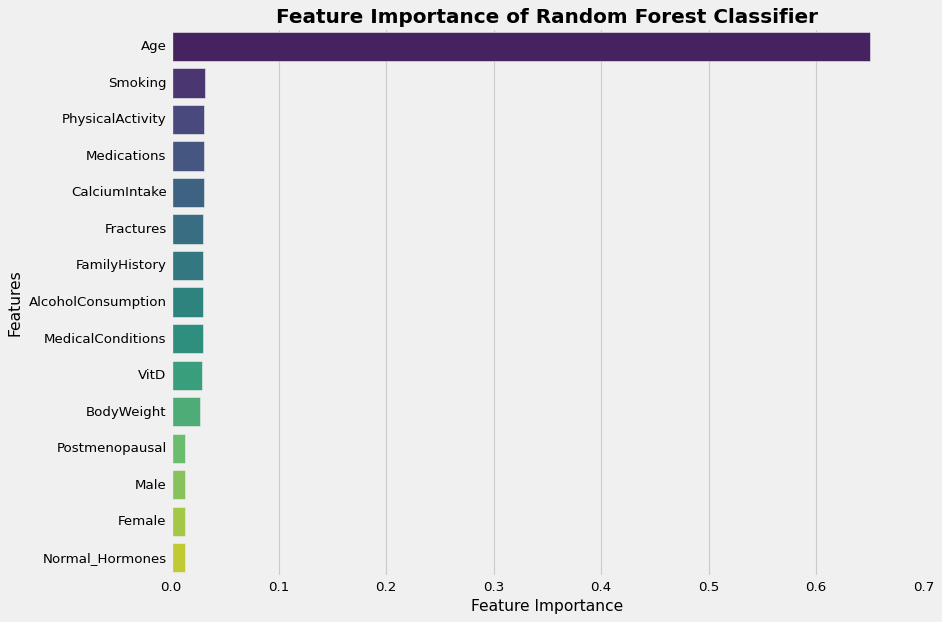

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x="Feature Importance", y=osteo_df_imp.index, data=osteo_df_imp, palette="viridis", ax=ax)

ax.set_title("Feature Importance of Random Forest Classifier", fontsize=18, fontweight='bold')

ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlabel("Feature Importance", fontsize=14)

ax.set_ylabel("Features", fontsize=14)

plt.tight_layout()

plt.show()


# Classification using KNN

In [ ]:
X_train

,Age,Male,Female,Normal_Hormones,Postmenopausal,FamilyHistory,BodyWeight,CalciumIntake,VitD,PhysicalActivity,Smoking,AlcoholConsumption,MedicalConditions,Medications,Fractures
1248,26,0,1,1,0,0,0,0,1,0,1,1,1,0,0
1779,19,1,0,1,0,1,0,0,1,1,0,0,0,0,0
434,90,1,0,1,0,1,1,0,0,0,0,1,1,1,1
1291,23,1,0,0,1,0,0,1,0,1,1,1,0,1,0
1554,18,0,1,1,0,1,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,21,0,1,1,0,1,1,1,1,0,0,0,1,1,1
1647,21,1,0,0,1,0,0,0,0,0,1,0,1,0,0
443,29,0,1,1,0,1,0,1,0,0,0,1,1,1,0
857,55,1,0,1,0,1,1,0,1,1,0,1,0,0,0


Feature Scaling

In [ ]:
display(X_train.describe())
print()
display(X_test.describe())

,Age,Male,Female,Normal_Hormones,Postmenopausal,FamilyHistory,BodyWeight,CalciumIntake,VitD,PhysicalActivity,Smoking,AlcoholConsumption,MedicalConditions,Medications,Fractures
count,1566.000000,1566.000000,1566.000000,1566.00000,1566.00000,1566.000000,1566.000000,1566.000000,1566.000000,1566.00000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,39.402299,0.501916,0.498084,0.50000,0.50000,0.487229,0.478289,0.518519,0.489144,0.48659,0.496169,0.494253,0.666667,0.494891,0.498084
std,21.505903,0.500156,0.500156,0.50016,0.50016,0.499997,0.499688,0.499817,0.500042,0.49998,0.500145,0.500127,0.471555,0.500134,0.500156
min,18.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,1.000000,0.000000,0.50000,0.50000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,54.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


,Age,Male,Female,Normal_Hormones,Postmenopausal,FamilyHistory,BodyWeight,CalciumIntake,VitD,PhysicalActivity,Smoking,AlcoholConsumption,MedicalConditions,Medications,Fractures
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,37.897959,0.525510,0.474490,0.505102,0.494898,0.502551,0.464286,0.489796,0.461735,0.446429,0.522959,0.500000,0.681122,0.505102,0.517857
std,20.726567,0.499987,0.499987,0.500613,0.500613,0.500632,0.499360,0.500535,0.499171,0.497757,0.500111,0.500639,0.466637,0.500613,0.500320
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,1.000000,1.000000
75%,49.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#print(X_train_scaled.min(), X_train_scaled.max())
#print(X_test_scaled.min(), X_test_scaled.max())

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Print the minimum and maximum values after scaling
print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.0 1.0


In [ ]:
#osteo_df_train_scaled = pd.DataFrame(X_train_scaled)

# Print the first 5 rows in tabular form
#print(osteo_df_train_scaled.head())

#osteo_df_test_scaled = pd.DataFrame(X_test_scaled)

# Print the first 5 rows in tabular form
#print(osteo_df_test_scaled.head())

Training

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

Testing

In [ ]:
y_pred = knn_clf.predict(X_test_scaled)
print(y_pred.shape)
y_pred

(392,)


array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6581632653061225


Visualization using Confusion Matrix

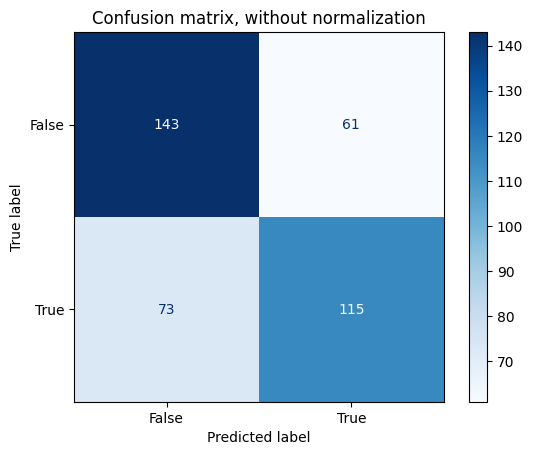

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
with plt.style.context("default"):
    disp = ConfusionMatrixDisplay.from_estimator(
        knn_clf,
        X_test_scaled,
        y_test,
        display_labels=[False, True],
        cmap=plt.cm.Blues,
        normalize=None,
    )
    disp.ax_.set_title("Confusion matrix, without normalization")

In [ ]:
accuracy_score(y_test, KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test))

0.8571428571428571

## **Regression**

In [ ]:
osteo_df

,Age,Age<50,Age>=50,Gender,Male,Female,Hormonal Changes,Normal_Hormones,Postmenopausal,FamilyHistory,...,CalciumIntake,VitD,PhysicalActivity,Smoking,AlcoholConsumption,MedicalConditions,Medications,Fractures,Osteoporosis,HighOsteoProbability
0,69,0,1,Female,0,1,Normal,1,0,1,...,1,0,1,1,1,1,1,1,1,True
1,32,1,0,Female,0,1,Normal,1,0,1,...,1,0,1,0,0,0,0,1,1,False
2,89,0,1,Female,0,1,Postmenopausal,0,1,0,...,0,0,0,0,1,1,1,0,1,True
3,78,0,1,Female,0,1,Normal,1,0,0,...,0,1,1,1,0,1,1,0,1,True
4,38,1,0,Male,1,0,Postmenopausal,0,1,1,...,1,0,0,1,0,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,1,0,Female,0,1,Normal,1,0,1,...,0,0,1,1,1,1,0,1,0,False
1954,23,1,0,Female,0,1,Postmenopausal,0,1,1,...,1,1,0,0,0,0,1,0,0,False
1955,34,1,0,Female,0,1,Postmenopausal,0,1,0,...,1,0,1,0,0,1,0,0,0,False
1956,25,1,0,Male,1,0,Postmenopausal,0,1,0,...,1,1,1,1,0,1,1,1,0,False


In [ ]:
#Selecting X and y


In [ ]:
X = osteo_df[['Age','Male', 'Female','Normal_Hormones','Postmenopausal', 'FamilyHistory', 'BodyWeight', 'CalciumIntake', 'VitD', 'PhysicalActivity', 'Smoking', 'AlcoholConsumption', 'MedicalConditions', 'Medications', 'Fractures', ]]

y = osteo_df["Osteoporosis"]

print(X.shape)
print(y.shape)

(1958, 15)
(1958,)


Train-Test split
Following 80-20 rule

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1566, 15)
(392, 15)
(1566,)
(392,)


### Regression using Random Forest

Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [ ]:
### Testing

In [ ]:
y_pred = rf_reg.predict(X_test)
print(y_pred.shape)
y_pred

(392,)


array([1.        , 1.        , 0.095     , 0.08      , 0.08      ,
       0.185     , 1.        , 0.01      , 0.292     , 1.        ,
       0.225     , 1.        , 0.07      , 0.51      , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.12      ,
       0.14      , 1.        , 0.185     , 0.309     , 1.        ,
       1.        , 1.        , 0.105     , 1.        , 1.        ,
       0.265     , 1.        , 0.115     , 0.185     , 0.11      ,
       1.        , 0.03      , 0.22      , 0.07      , 0.14      ,
       0.98      , 0.16708333, 0.99      , 1.        , 1.        ,
       1.        , 0.26      , 0.14083333, 1.        , 0.005     ,
       1.        , 0.105     , 1.        , 0.065     , 1.        ,
       0.2075    , 1.        , 0.085     , 0.275     , 0.22      ,
       1.        , 0.13      , 1.        , 0.205     , 0.175     ,
       0.16      , 0.09      , 0.045     , 0.045     , 0.05      ,
       0.195     , 1.        , 0.19      , 1.        , 0.265  

In [ ]:
y_test

642     1
205     1
1224    0
1093    0
1662    0
       ..
1511    0
99      1
1530    0
151     1
841     1
Name: Osteoporosis, Length: 392, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

RMSE: 0.31588288537053993
R²: 0.599610893628411


In [ ]:
y_test.std() #if the RMSE is smaller than the standard deviation of y_test, it's usually a good model

0.49984991745121893

Conclusion:

The Root Mean Square Error (RMSE) of approximately 0.2943 indicates that, on average, the model's predictions are off by about 0.2943 units from the actual values. This suggests that the model's predictive performance is reasonably good, as the RMSE is relatively low.

The R² value of approximately 0.6532 indicates that around 65.32% of the variance in the dependent variable (y) is explained by the independent variable(s) used in the model. While this value is not extremely high, it still suggests that the model captures a significant portion of the variability in the data.

The standard deviation of the test set (y_test) is approximately 0.5004. This provides context for the scale of the target variable, indicating the variability of the actual values in the test set.

Overall, the model appears to have decent predictive performance, as indicated by the relatively low RMSE and the moderate R² value. However, it's essential to consider the specific context of the problem and the domain knowledge to determine whether the model's performance is satisfactory for the intended application.

Plotting Graphs

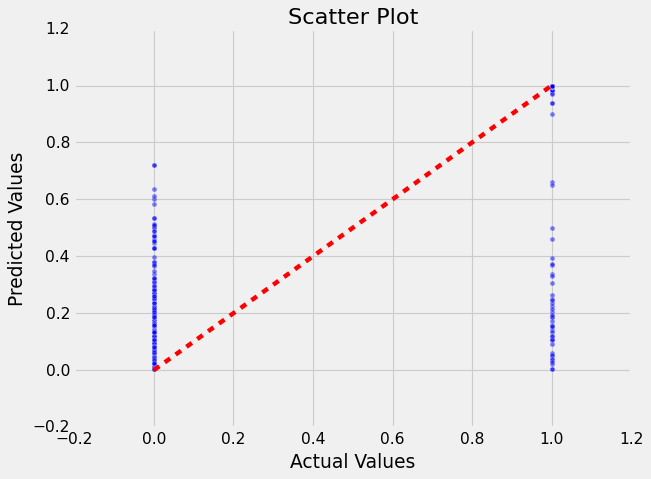

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(y_true, y_pred, title="Scatter Plot"):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

plot_scatter(y_test, y_pred)

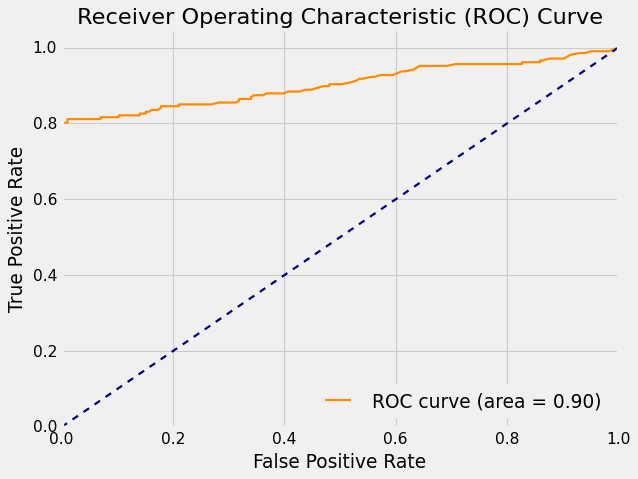

In [ ]:
# Convert the target variable into binary format for ROC curve
y_binary_test = (y_test > 0.5).astype(int)  # Assuming 0.5 as the threshold for binary classification
y_binary_pred = (y_pred > 0.5).astype(int)

# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_binary_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The Receiver Operating Characteristic (ROC) curve illustrates the trade-off between the true positive rate (sensitivity) and false positive rate (1-specificity) for different threshold values of a binary classification model. In this plot, a higher Area Under the Curve (AUC) value indicates better model performance. For this regression problem with a binary target variable ('Osteoporosis'), the target variable has been converted into binary format for ROC curve evaluation

An AUC of 0.94 signifies that the classifier has very good discriminatory power. Specifically, it suggests that the classifier has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative one. In practical terms, this means the classifier is performing well in distinguishing between the two classes, with only a relatively small chance of misclassification.

### Regression using Linear Regression

In [ ]:
#Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.0 1.0


In [ ]:
#Training

In [ ]:

from sklearn.linear_model import LinearRegression

linear_regr = LinearRegression()
linear_regr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
#Testing

In [ ]:
y_pred = linear_regr.predict(X_test_scaled)
print(y_pred.shape)
y_pred

(392,)


array([0.71191406, 0.51464844, 0.10644531, 0.15332031, 0.37988281,
       0.17675781, 0.59375   , 0.3671875 , 0.21777344, 0.90234375,
       0.12792969, 1.2578125 , 0.17578125, 0.43457031, 0.92871094,
       1.18847656, 0.69433594, 1.00390625, 1.109375  , 0.13476562,
       0.13378906, 1.21972656, 0.47558594, 0.22949219, 0.49902344,
       0.55664062, 1.11425781, 0.30859375, 1.16992188, 0.84179688,
       0.14355469, 1.14746094, 0.15917969, 0.140625  , 0.1796875 ,
       1.1484375 , 0.19335938, 0.19238281, 0.29199219, 0.33691406,
       0.33398438, 0.36523438, 0.3671875 , 1.20605469, 0.92578125,
       0.48925781, 0.37207031, 0.09765625, 1.20898438, 0.37304688,
       1.08007812, 0.39550781, 1.04882812, 0.14257812, 1.03320312,
       0.09765625, 1.05664062, 0.45605469, 0.12597656, 0.36132812,
       0.93457031, 0.09179688, 1.09667969, 0.43164062, 0.09179688,
       0.38671875, 0.140625  , 0.20117188, 0.40234375, 0.38867188,
       0.09472656, 1.00097656, 0.33496094, 0.86230469, 0.21679

In [ ]:
# evaluate the predictions
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

RMSE: 0.3730504064008629
R²: 0.4415746885828381


In [ ]:
y_test.std()

0.49984991745121893

##Conclusion

RMSE: The Root Mean Square Error (RMSE) of approximately 0.348 suggests that, on average, the model's predictions deviate from the actual values by around 0.348 units. Lower RMSE values indicate better predictive accuracy, so while 0.348 is not extremely low, it's still a reasonable level depending on the context of your data.

R²: The R-squared (R²) value of approximately 0.515 indicates that the model explains about 51.5% of the variance in the dependent variable. R² values range from 0 to 1, where higher values signify a better fit of the model to the data. While 0.515 is not exceptionally high, it does suggest that the model captures a significant portion of the variability in the data.

Comparison to Standard Deviation: Comparing the RMSE to the standard deviation of the test data (approximately 0.5004) shows that the RMSE is slightly lower than the standard deviation. This indicates that the model's predictive performance is reasonable relative to the variability in the actual values.

In conclusion, while the model demonstrates moderate predictive performance with a RMSE of 0.348 and an R² of 0.515, there is still room for improvement. Further refinement of the model or exploration of additional features may enhance its accuracy and explanatory power.